# ML Project for calculating Credit Worthiness for Rural India

In [1]:
# import neccessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset file
data = pd.read_csv('trainingData.csv')
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [3]:
print(data.shape,data.columns,sep='\n')

(40000, 21)
Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount'],
      dtype='object')


In [4]:
# Let's make a copy of dataset
dataset = data.copy()

In [5]:
# Let's find the Data type of each variables
dataset.dtypes

Id                         int64
city                      object
age                        int64
sex                       object
social_class              object
primary_business          object
secondary_business        object
annual_income            float64
monthly_expenses         float64
old_dependents             int64
young_dependents           int64
home_ownership           float64
type_of_house             object
occupants_count            int64
house_area               float64
sanitary_availability    float64
water_availabity         float64
loan_purpose              object
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

In [6]:
# Let's find out any missing values in columns
print (dataset.isnull().sum())

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64


In [7]:
dataset_null = dataset.isnull().sum()
print ('Following columns have null value \n', [dataset_null.index[i] for i in range(0,20) if dataset_null.values[i]>0])

Following columns have null value 
 ['city', 'social_class', 'primary_business', 'secondary_business', 'monthly_expenses', 'home_ownership', 'type_of_house', 'sanitary_availability', 'water_availabity', 'loan_purpose']


In [8]:
dataset_city = dataset.city
# Drop the null values
dataset_city1 = dataset_city.dropna(axis = 0)
dataset_city1.isnull().sum()

0

In [9]:
dataset.groupby('city').city.count()

city
#NAME?                       2
(KODANGAL MANDAL) NARVA      1
24 PARGANAS,SOUTH            1
752102                       2
AINTHAPALI                  11
                          ... 
vadakkencherry             107
village                      1
wadhawan                     1
yasvant sagar                1
yemmiganur                   1
Name: city, Length: 856, dtype: int64

In [10]:
dataset_city2 = dataset['city'].astype('str').str.lower()
dataset_city2
%store dataset_city2

Stored 'dataset_city2' (Series)


In [11]:
dataset_city2[210: 216]

210       gwalior
211    mathurapur
212     noorsaray
213     noorsaray
214    mathurapur
215    mathurapur
Name: city, dtype: object

In [12]:
# Drop null values 
dataset_city3 = dataset_city2.dropna(axis = 0)
dataset_city3.isnull().sum()


0

In [13]:
dataset_city4 = dataset_city2.unique()
dataset_city3.tolist()


['dhanbad',
 'manjapra',
 'dhanbad',
 'nan',
 'nuapada',
 'nuapada',
 'dhanbad',
 'nan',
 'dhanbad',
 'dhanbad',
 'nan',
 'dhanbad',
 'nan',
 'dhanbad',
 'dhanbad',
 'dhanbad',
 'nan',
 'dhanbad',
 'dhanbad',
 'nan',
 'dhanbad',
 'nan',
 'dhanbad',
 'dhanbad',
 'nuapada',
 'dhanbad',
 'dhanbad',
 'nuapada',
 'nuapada',
 'dhanbad',
 'dhanbad',
 'nuapada',
 'nan',
 'nuapada',
 'nan',
 'nuapada',
 'nan',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'plakkad',
 'nan',
 'palakkad',
 'nan',
 'palakkad',
 'nan',
 'nan',
 'palakkad',
 'palakkad',
 'palakkad',
 'palakkad',
 'palakkad',
 'palakkad',
 'palakkad',
 'nuapada',
 'palakkad',
 'palakkad',
 'nuapada',
 'nan',
 'nuapada',
 'palakkad',
 'nuapada',
 'palakkad',
 'nuapada',
 'palakkad',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'nuapada',
 'palakkad',
 'palakkad',
 'palakkad'

In [14]:
dataset_city_trial = dataset_city2.head(15)
dataset_city_trial

0      dhanbad
1     manjapra
2      dhanbad
3          nan
4      nuapada
5      nuapada
6      dhanbad
7          nan
8      dhanbad
9      dhanbad
10         nan
11     dhanbad
12         nan
13     dhanbad
14     dhanbad
Name: city, dtype: object

In [15]:
# This code is to create a new column of state.
# But this code takes a lot of time to run and gets interrupted more often.
# So decided to drop 'city' column from dataset
state = []
j = 0
from geopy.geocoders import Nominatim
import time
for place in dataset_city_trial.tolist():
    if place == 'nan':
        state.append(np.nan)
    if place != 'nan':
        time.sleep(1)
        geolocator = Nominatim(user_agent="dp_palai@yahoo.co.in")
        location = geolocator.geocode(place)
        if location.__class__.__name__ == 'NoneType':
            state.append('Invalid Name')
        else:
            place_info = location.raw
            address_place = place_info['display_name'].split(',')
            state_PIN = address_place[-3:-1]
            state_PIN_edit = [item.strip(' ') for item in state_PIN]
            state_name = [item for item in state_PIN_edit if not item.isdigit()]
            state.append(state_name[0])
    j+= 1
    print (j)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [16]:
state

['Jharkhand',
 'Kerala',
 'Jharkhand',
 nan,
 'Nuapada',
 'Nuapada',
 'Jharkhand',
 nan,
 'Jharkhand',
 'Jharkhand',
 nan,
 'Jharkhand',
 nan,
 'Jharkhand',
 'Jharkhand']

In [17]:
# Different age entry in 'age' feature
dataset.age.unique()

array([    22,     21,     24,     26,     23,     28,     38,     25,
           34,     37,     50,     54,     57,     48,     32,     35,
           43,     51,     39,     41,     46,     45,     44,     47,
           40,     42,     33,     53,     30,     29,     36,     19,
           27,     20,     55,     49,     31,     52,     58,     56,
           18,     59,     60,     61,     63,     64,     62,     65,
           67,     70,    205, 766105,     74,      2,    288,     69,
           66,     72,     68,     82,     88,     75], dtype=int64)

In [18]:
# Some unrealistic values are entered, must be due to mistake, that must be removed
dataset_age = dataset.loc[(dataset['age']> 15) & (dataset['age']< 100) ]
dataset_age.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [19]:
# Mistakes are eliminated
dataset_age.age.unique()

array([22, 21, 24, 26, 23, 28, 38, 25, 34, 37, 50, 54, 57, 48, 32, 35, 43,
       51, 39, 41, 46, 45, 44, 47, 40, 42, 33, 53, 30, 29, 36, 19, 27, 20,
       55, 49, 31, 52, 58, 56, 18, 59, 60, 61, 63, 64, 62, 65, 67, 70, 74,
       69, 66, 72, 68, 82, 88, 75], dtype=int64)

In [20]:
# Mean of Age column after eliminating unrealistic age
dataset_age.age.mean()

35.999349918739846

In [21]:
# Average loan amount per age
avg_loan_amount_by_age = dataset.groupby('age').loan_amount.mean().round()
avg_loan_amount_by_age

age
2          5000.0
18         7575.0
19         8380.0
20         7398.0
21         8238.0
           ...   
82         2000.0
88        10000.0
205        5000.0
288        7500.0
766105     3000.0
Name: loan_amount, Length: 62, dtype: float64

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


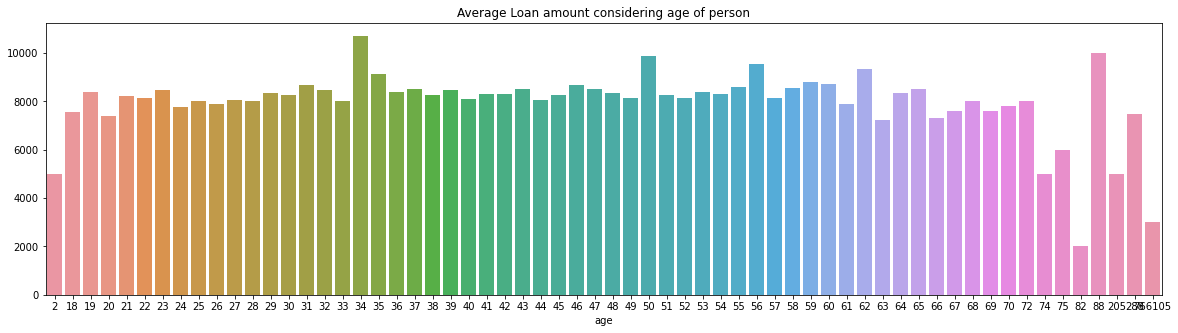

In [22]:
# Plotting of Average loan amount per age
plt.figure(figsize = (20, 5))
plt.title('Average Loan amount considering age of person')
sns.barplot(avg_loan_amount_by_age.index, avg_loan_amount_by_age.values)
plt.show()

In [23]:
# Let's replace below 15 and higher than 100 age to average age that is 36
def age_mean(x):
    if x < 15 or x > 100:
        x = 36
    return x

dataset['age'] = dataset.age.apply(lambda x : age_mean(x))
dataset['age'].unique()

array([22, 21, 24, 26, 23, 28, 38, 25, 34, 37, 50, 54, 57, 48, 32, 35, 43,
       51, 39, 41, 46, 45, 44, 47, 40, 42, 33, 53, 30, 29, 36, 19, 27, 20,
       55, 49, 31, 52, 58, 56, 18, 59, 60, 61, 63, 64, 62, 65, 67, 70, 74,
       69, 66, 72, 68, 82, 88, 75], dtype=int64)

In [24]:
dataset['age_cat'] = dataset['age']
for i in range(0, len(dataset)):
    if dataset['age'][i] <=30:
        dataset['age_cat'][i] = '20s'
    if dataset['age'][i] > 30 and dataset['age'][i] <=40 :
        dataset['age_cat'][i] = '30s'
    if dataset['age'][i] > 40 and dataset['age'][i] <=50:
        dataset['age_cat'][i] = '40s'
    if dataset['age'][i] > 50 and dataset['age'][i] <=60:
        dataset['age_cat'][i] = '50s'
    if dataset['age'][i] > 60 and dataset['age'][i] <=70:
        dataset['age_cat'][i] = '60s'
    if dataset['age'][i] > 70 and dataset['age'][i] <=80:
        dataset['age_cat'][i] = '70s'        
    if dataset['age'][i] > 80 and dataset['age'][i] <=90:
        dataset['age_cat'][i] = '80s'
    if dataset['age'][i] > 90 and dataset['age'][i] <=100:
        dataset['age_cat'][i] = '90s'

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [25]:
dataset['age_cat'].unique()

array(['20s', '30s', '40s', '50s', '60s', '70s', '80s'], dtype=object)

In [26]:
# Entry in 'sex' feature
dataset.sex.unique()

array(['F', 'M', 'TG'], dtype=object)

In [27]:
# Average loan amount per gender
avg_loan_amount_by_sex = dataset.groupby('sex').loan_amount.mean().round()
dataset[['sex', 'loan_amount']].groupby('sex', as_index = False).loan_amount.mean().round()

,sex,loan_amount
0,F,8375.0
1,M,9001.0
2,TG,9000.0


C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


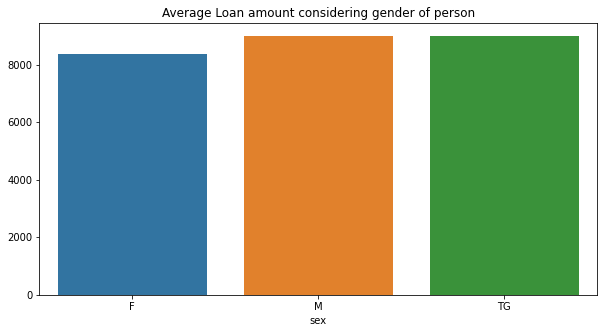

In [28]:
# Plotting of Average loan amount per age
plt.figure(figsize = (10, 5))
plt.title('Average Loan amount considering gender of person')
sns.barplot(avg_loan_amount_by_sex.index, avg_loan_amount_by_sex.values)
plt.show()

In [29]:
# Number of 'social_class' entry
dataset.groupby('social_class').social_class.count()

social_class
0bc                 4
23                  1
24 telugashetty     3
27                  1
2nd                 1
                   ..
st                 58
tanwar              4
teli                4
thakur              1
vjnt                2
Name: social_class, Length: 519, dtype: int64

In [30]:
# Number of 'primary_business' entry
dataset.primary_business.unique()

array(['Tailoring', 'Beauty salon', 'General store',
       'Puffed rice business', 'Poultry farm', 'Tea stall', 'Cow Rearing',
       'Vegetable vendor', 'Banana Cultivation', 'Utensils selling',
       'Readymade Garments', 'Medical shop', 'Electronic goods shop',
       'Milk business', 'Grocery store', 'Carpenter/Wood business',
       'Goat rearing', 'Vegetable cultivation', 'Cattle rearing',
       'Brick manufacturing unit', 'Buffalo rearing', 'Wet grinding',
       'Petty shop', 'Rice business', 'Tiffin center', 'Betel shop',
       'Cycle repair shop', 'Bakery', 'Gram cultivation', 'Sweets shop',
       'Fancy Store', 'Laundry', 'Provision store', 'Snacks business',
       'Beauty parlour', 'Beedi rolling business', 'Eggs selling',
       'Embroidery work', 'Helmets selling', 'Auto Rickshaw',
       'Fish vendor', 'Artificial Flower Making', 'Paddy cultivation',
       'Leaf plate making', 'Stationery Shop', 'Paddy processing',
       'Pig rearing', 'Flower Business', 'Saree b

In [31]:
dataset.groupby('primary_business').primary_business.count().sort_values(ascending = False).head(15)

primary_business
Tailoring                3971
Goat rearing             2268
Cow Rearing              2077
Handloom Work            2068
Vegetable cultivation    1704
Grocery store            1369
School                   1332
Milk business            1310
Vegetable vendor         1174
Weaver                   1157
Saree business           1000
Embroidery work           942
Fish rearing              735
Poultry farm              726
Rice business             678
Name: primary_business, dtype: int64

In [32]:
dataset.primary_business = dataset.primary_business.astype('str')
dataset.primary_business.dtype

dtype('O')

In [33]:
dataset['primary_business_cat'] = dataset['primary_business'].apply(lambda x : x.lower())
dataset['primary_business_cat'] = dataset['primary_business_cat'].apply(lambda x : x.split(' ')[-1])
dataset['primary_business_cat']

0        tailoring
1        tailoring
2            salon
3        tailoring
4            store
           ...    
39995      rearing
39996    tailoring
39997      rearing
39998      rearing
39999      rearing
Name: primary_business_cat, Length: 40000, dtype: object

In [34]:
def primary_business_category(x):
    if (x == 'cultivation' or x == 'farmer'):
        x = 'cultivation'
        return x
    if (x == 'private job' or x == 'professional' or x == 'school'):
        x = 'job'
        return x
    if x == 'rearing':
        x = 'rearing'
        return x
    if (x == 'store' or x == 'shop' or x == 'stall'):
        x = 'shop'
        return x
    else:
        x = 'business'
        return x

for i in range(0, len(dataset)):
    dataset['primary_business_cat'][i] = primary_business_category(dataset['primary_business_cat'][i])

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
dataset['primary_business_cat'].unique()

array(['business', 'shop', 'rearing', 'cultivation', 'job'], dtype=object)

In [36]:
dataset_dailywages = dataset[dataset['primary_business'] == 'Daily wages']
dataset_dailywages

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount,age_cat,primary_business_cat
33769,33770,Digras,36,F,Muslim,Daily wages,none,72000.0,2500.0,0,...,4,100.0,1.0,1.0,Others,12,12,5000.0,30s,business
36611,36612,Digras,36,F,Muslim,Daily wages,none,72000.0,2500.0,0,...,4,100.0,1.0,1.0,Others,12,12,5000.0,30s,business


In [37]:
# Average loan amount per gender
dataset[['primary_business_cat', 'loan_amount']].groupby('primary_business_cat', as_index = False).loan_amount.mean().round().sort_values(by = 'loan_amount')

,primary_business_cat,loan_amount
4,shop,7783.0
1,cultivation,7804.0
3,rearing,8014.0
2,job,8322.0
0,business,8687.0


In [38]:
# Number of entry in 'secondary_business'
dataset.groupby('secondary_business').secondary_business.count()

secondary_business
Agriculture             2105
Daily wage labourer     2545
Livestock rearing        179
Others                  2564
none                   27366
Name: secondary_business, dtype: int64

In [39]:
# Let's create a column with information that a secondary business is there or not
dataset['secondary_business_YES_NO'] = dataset.secondary_business.apply(lambda x : 'NO' if (x =='none' and np.nan) else 'YES')
dataset['secondary_business_YES_NO']

0        YES
1         NO
2        YES
3         NO
4        YES
        ... 
39995     NO
39996     NO
39997     NO
39998     NO
39999     NO
Name: secondary_business_YES_NO, Length: 40000, dtype: object

In [40]:
# Let's see average loan amount of people who have secondary business and who don't have secondary business
avg_loan_amount_by_secondary_business = dataset.groupby('secondary_business_YES_NO').loan_amount.mean().round()
dataset[['secondary_business_YES_NO', 'loan_amount']].groupby('secondary_business_YES_NO', as_index = False).loan_amount.mean().round()

,secondary_business_YES_NO,loan_amount
0,NO,9117.0
1,YES,6887.0


C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


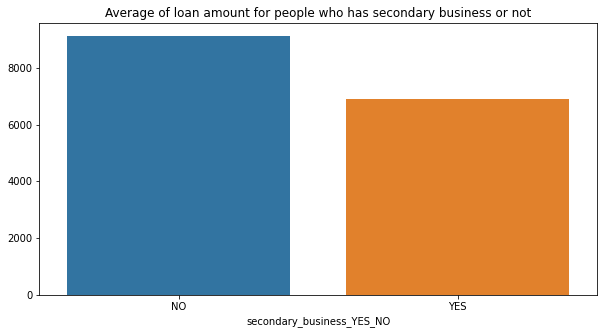

In [41]:
# Plotting average loan amount considering people who have secondary business or not
plt.figure(figsize = (10, 5))
plt.title('Average of loan amount for people who has secondary business or not')
sns.barplot(avg_loan_amount_by_secondary_business.index, avg_loan_amount_by_secondary_business.values)
plt.show()

In [42]:
#  Annual income sample sorted
dataset_annual_income = dataset.sort_values(by = 'annual_income')

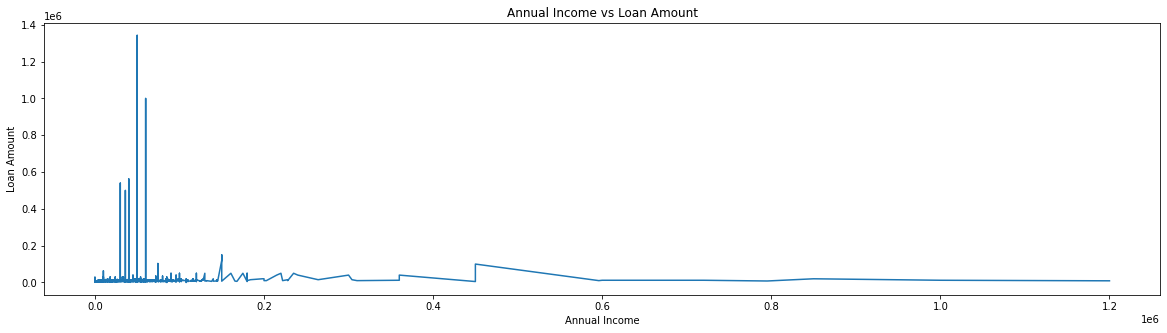

In [43]:
# Plot of Annual Income vs Loan amount
plt.figure(figsize = (20, 5))
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.plot(dataset_annual_income['annual_income'], dataset_annual_income['loan_amount'])
plt.show()

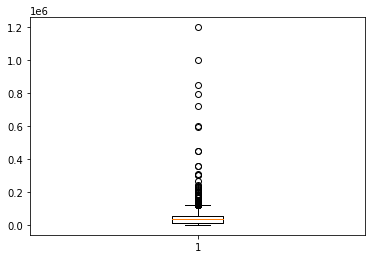

In [44]:
# Outliers in Annual_income
plt.figure()
plt.boxplot(dataset.annual_income)
plt.show()

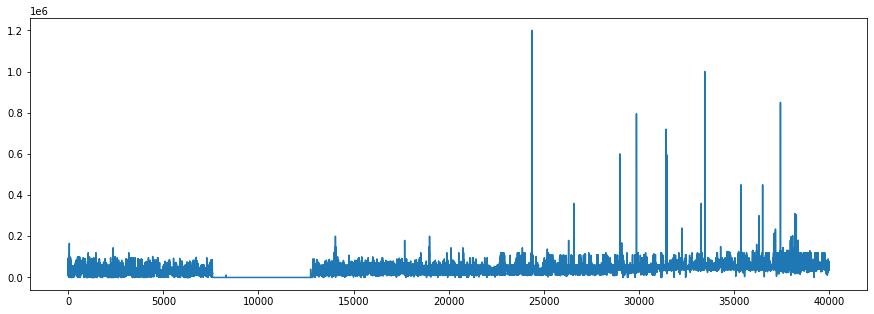

In [45]:
# Let's plot annual income
plt.figure(figsize = (15,5))
plt.plot(dataset.annual_income)
plt.show()

In [46]:
dataset['annual_income_cat'] = pd.cut(dataset['annual_income'], bins = 4, labels = ['low', 'medium', 'high', 'extremely high' ])
dataset['annual_income_cat']

0        low
1        low
2        low
3        low
4        low
        ... 
39995    low
39996    low
39997    low
39998    low
39999    low
Name: annual_income_cat, Length: 40000, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'extremely high']

In [47]:
# Average Loan amount considering Annual Income
dataset[['annual_income_cat', 'loan_amount']].groupby('annual_income_cat', as_index = False).loan_amount.mean()

,annual_income_cat,loan_amount
0,low,8408.700328
1,medium,25500.000000
2,high,13333.333333
3,extremely high,10500.000000


In [48]:
# Average Annual income in each category of Annual Income
dataset[['annual_income_cat', 'annual_income']].groupby('annual_income_cat', as_index = False).annual_income.mean().round()

,annual_income_cat,annual_income
0,low,37453.0
1,medium,428750.0
2,high,788378.0
3,extremely high,1100000.0


In [49]:
# Maximum Annual income in each category of Annual Income
dataset[['annual_income_cat', 'annual_income']].groupby('annual_income_cat', as_index = False).annual_income.max()

,annual_income_cat,annual_income
0,low,300000.0
1,medium,600000.0
2,high,850000.0
3,extremely high,1200000.0


In [50]:
# Monthly expenses are sorted
dataset_monthly_expenses = dataset.sort_values(by = 'monthly_expenses')
# null values in 'monthly expenses' are dropped
dataset_monthly_expenses = dataset_monthly_expenses.drop(dataset_monthly_expenses[dataset_monthly_expenses['monthly_expenses'].isnull()].index, axis =0)
dataset_monthly_expenses

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount,age_cat,primary_business_cat,secondary_business_YES_NO,annual_income_cat
28523,28524,Pusad,30,F,OBC,Tea stall,none,48000.0,2.0,0,...,1.0,1.0,Eateries,12,12,15000.0,20s,shop,NO,low
27742,27743,Nanjangud,25,F,Telugu Shetty,Tailoring,none,36000.0,2.0,0,...,1.0,1.0,Apparels,12,12,10000.0,20s,business,NO,low
28524,28525,Pusad,30,F,OBC,Tea stall,none,48000.0,2.0,0,...,1.0,1.0,Eateries,12,12,15000.0,20s,shop,NO,low
28520,28521,Pusad,43,F,OBC,Pottery making,none,60000.0,2.0,0,...,1.0,1.0,Handicrafts,12,12,15000.0,40s,business,NO,low
28519,28520,Pusad,43,F,OBC,Pottery making,none,60000.0,2.0,0,...,1.0,1.0,Handicrafts,12,12,15000.0,40s,business,NO,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12942,12943,PUSAD,35,F,OBC,Flour mill,none,48000.0,125000.0,0,...,1.0,1.0,Business Services - I,12,12,5000.0,30s,business,NO,low
7229,7230,PUSAD,42,F,OPEN,Tiffin center,none,24000.0,125000.0,1,...,1.0,0.5,Eateries,12,12,5000.0,40s,business,NO,low
20381,20382,Shantipur,26,F,Sechudle Caste,Handloom Work,none,24000.0,130000.0,0,...,1.0,1.0,Handicrafts,12,50,12000.0,20s,business,NO,low
37100,37101,Ranjani,29,M,Open,Fabrication,none,150000.0,150000.0,0,...,1.0,1.0,Construction Related Activities,24,24,120000.0,20s,business,NO,low


In [51]:
dataset_monthly_expenses.monthly_expenses.isnull().sum()

0

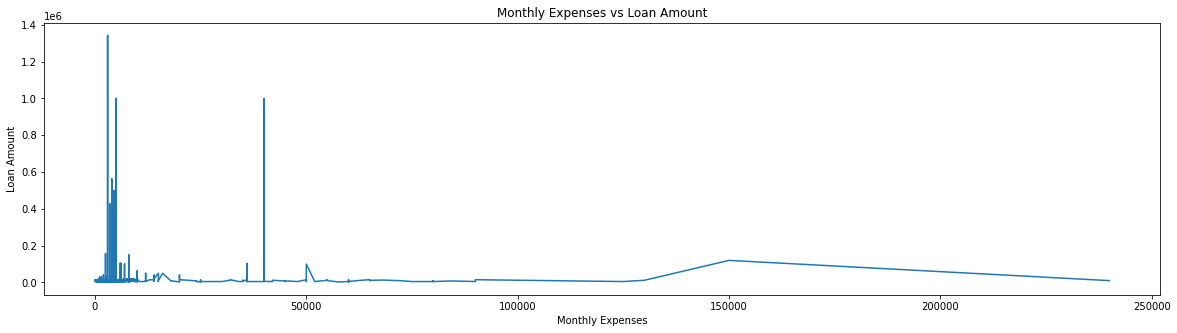

In [52]:
# Plot of Monthly Expenses vs Loan amount
plt.figure(figsize = (20, 5))
plt.title('Monthly Expenses vs Loan Amount')
plt.xlabel('Monthly Expenses')
plt.ylabel('Loan Amount')
plt.plot(dataset_monthly_expenses['monthly_expenses'], dataset_monthly_expenses['loan_amount'])
plt.show()

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


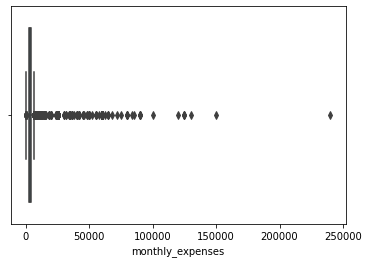

In [53]:
# Plot to check outliers in Monthly_expenses
plt.figure()
sns.boxplot(dataset.monthly_expenses)
plt.show()

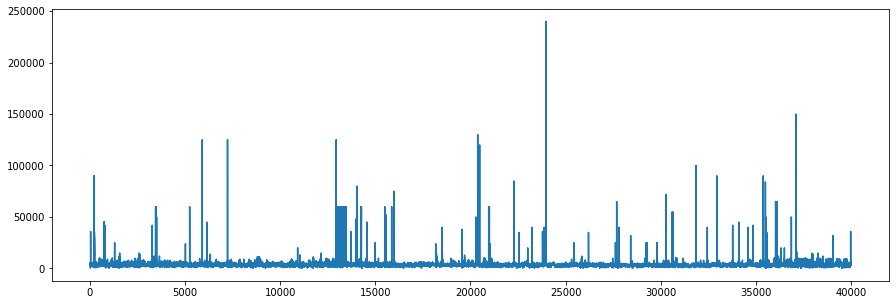

In [54]:
# Let's plot to check outlier
plt.figure(figsize = (15,5))
plt.plot(dataset.monthly_expenses)
plt.show()

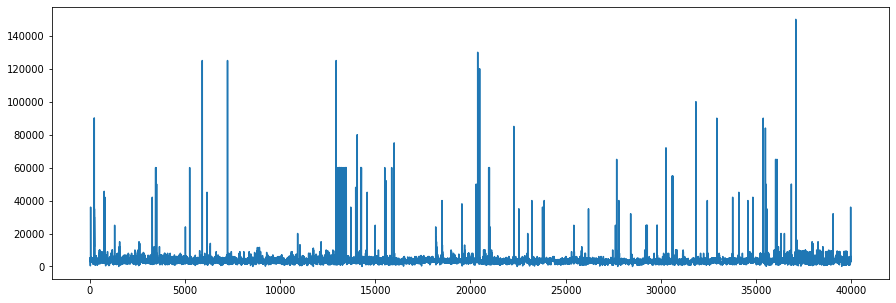

In [55]:
# After plotting having outlier removed
plt.figure(figsize= (15,5))
plt.plot(dataset.monthly_expenses[dataset['monthly_expenses']< 200000])
plt.show()

In [56]:
# After removing outliers let's find out average monthly expenses
dataset_monthly_expenses_avg = dataset.monthly_expenses[dataset['monthly_expenses']<200000].mean()
dataset_monthly_expenses_avg

3804.952757090198

In [57]:
# Replace outliers with average value of monthly expenses
def monthly_expenses_avg(x):
    if x > 200000:
        x = 3805
    return x
dataset['monthly_expenses'] = dataset.monthly_expenses.apply(lambda x : monthly_expenses_avg(x))

In [58]:
# replace missing values with average amount of monthly_expenses
dataset['monthly_expenses'] = dataset['monthly_expenses'].fillna(dataset['monthly_expenses'].mean())

In [59]:
# Let's create category column for Monthly Expenses
dataset['monthly_expenses_cat'] = pd.cut(dataset['monthly_expenses'], bins = 3, labels = ['low', 'medium', 'high'])

In [60]:
dataset['monthly_expenses_cat'].unique()

['low', 'medium', 'high']
Categories (3, object): ['low' < 'medium' < 'high']

In [61]:
# Average Loan amount for each category of Monthly Expenses
dataset[['monthly_expenses_cat', 'loan_amount']].groupby('monthly_expenses_cat', as_index = False).loan_amount.mean()

,monthly_expenses_cat,loan_amount
0,low,8418.903112
1,medium,6114.285714
2,high,25500.000000


In [62]:
# 'old_dependents' feature entries
dataset.old_dependents.unique()

array([0, 1, 2, 3], dtype=int64)

In [63]:
# Average loan amount as per 'old dependents' entries
avg_loan_amount_by_old_dependents = dataset.groupby('old_dependents').loan_amount.mean().round()
dataset[['old_dependents', 'loan_amount']].groupby('old_dependents', as_index = False).loan_amount.mean().round()

,old_dependents,loan_amount
0,0,8397.0
1,1,8638.0
2,2,10430.0
3,3,6000.0


C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


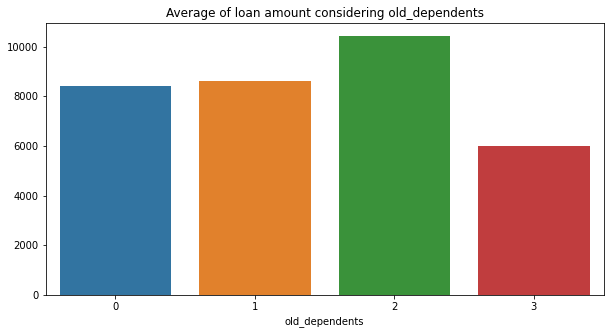

In [64]:
# Plot of Average of loan amount considering old_dependents
plt.figure(figsize = (10, 5))
plt.title('Average of loan amount considering old_dependents')
sns.barplot(avg_loan_amount_by_old_dependents.index, avg_loan_amount_by_old_dependents.values)
plt.show()

In [65]:
# 'young_dependents' entries 
dataset.young_dependents.unique()

array([2, 1, 0, 3, 4, 5, 6, 7], dtype=int64)

In [66]:
# # Average loan amount as per 'young dependents' entries
avg_loan_amount_by_young_dependents = dataset.groupby('young_dependents').loan_amount.mean().round()
dataset[['young_dependents', 'loan_amount']].groupby('young_dependents', as_index = False).loan_amount.mean().round()

,young_dependents,loan_amount
0,0,8223.0
1,1,8484.0
2,2,8661.0
3,3,8357.0
4,4,7622.0
5,5,7533.0
6,6,9711.0
7,7,8875.0


C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


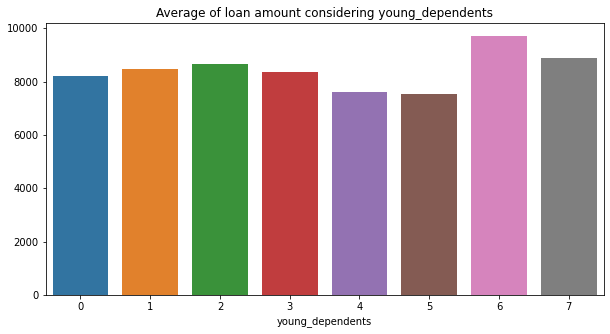

In [67]:
# plot of Average of loan amount considering young_dependents
plt.figure(figsize = (10, 5))
plt.title('Average of loan amount considering young_dependents')
sns.barplot(avg_loan_amount_by_young_dependents.index, avg_loan_amount_by_young_dependents.values)
plt.show()

In [68]:
# 'home_ownership' feature entry
dataset.home_ownership.unique()

array([ 1.,  0., nan])

In [69]:
# 'home_ownership' entries count
dataset.groupby('home_ownership').home_ownership.count()

home_ownership
0.0     1090
1.0    38531
Name: home_ownership, dtype: int64

In [70]:
# 'home_ownership' null value
dataset.home_ownership.isnull().sum()

379

In [71]:
# Missing value is replaced with variable which has highest entry
dataset['home_ownership'] = dataset['home_ownership'].fillna(1.0)

In [72]:
dataset.home_ownership.isnull().sum()

0

In [73]:
# Average loan amount considering home ownership
avg_loan_amount_by_home_ownership = dataset.groupby('home_ownership').loan_amount.mean().round()
dataset[['home_ownership', 'loan_amount']].groupby('home_ownership', as_index = False).loan_amount.mean().round()

,home_ownership,loan_amount
0,0.0,8279.0
1,1.0,8416.0


C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


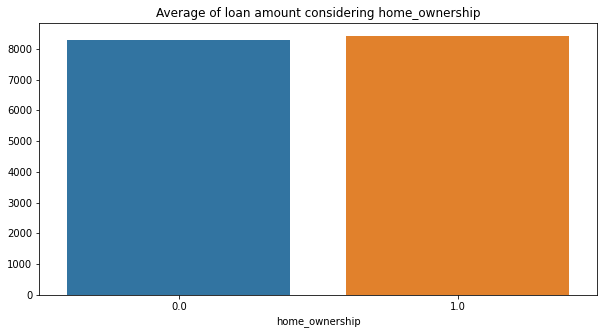

In [74]:
# plot of Average of loan amount considering home_ownership
plt.figure(figsize = (10, 5))
plt.title('Average of loan amount considering home_ownership')
sns.barplot(avg_loan_amount_by_home_ownership.index, avg_loan_amount_by_home_ownership.values)
plt.show()

In [75]:
# As it looks average loan amount of all variables in 'home_ownership' has not much difference so can be dropped

In [76]:
# 'type_of_house' entries
dataset.type_of_house.unique()

array(['R', 'T1', 'T2', nan], dtype=object)

In [77]:
# Average Loan amount with repect to each unique entries
avg_loan_amount_by_type_of_house = dataset.groupby('type_of_house').loan_amount.mean().round()
dataset[['type_of_house', 'loan_amount']].groupby('type_of_house', as_index = False).loan_amount.mean().round()

,type_of_house,loan_amount
0,R,9532.0
1,T1,8183.0
2,T2,8267.0


C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


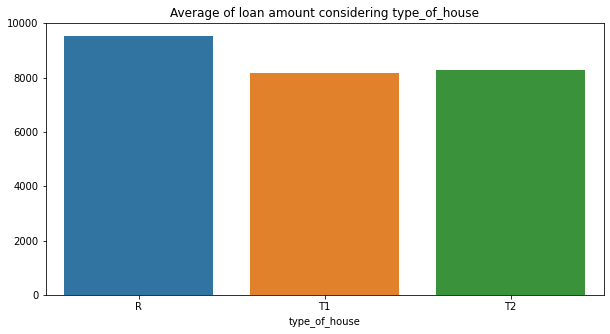

In [78]:
# plot of Average of loan amount considering type_of_house
plt.figure(figsize = (10, 5))
plt.title('Average of loan amount considering type_of_house')
sns.barplot(avg_loan_amount_by_type_of_house.index, avg_loan_amount_by_type_of_house.values)
plt.show()

In [79]:
#fill missing values 
dataset['type_of_house'] = dataset['type_of_house'].fillna(method = 'ffill')

In [80]:
# 'occupants_counts' entries
dataset.occupants_count.unique()

array([     4,      5,      1,      3,      7,      6,      2,      8,
           10,    250,    400,      9,      0,     11,    300,    450,
          600,     12,    700,    900,    100,     15, 950000],
      dtype=int64)

In [81]:
# drop an unrealistic value in 'occupants_count' feature
dataset_occupants_count = dataset.drop(dataset[dataset['occupants_count'] == 950000].index, axis = 0)

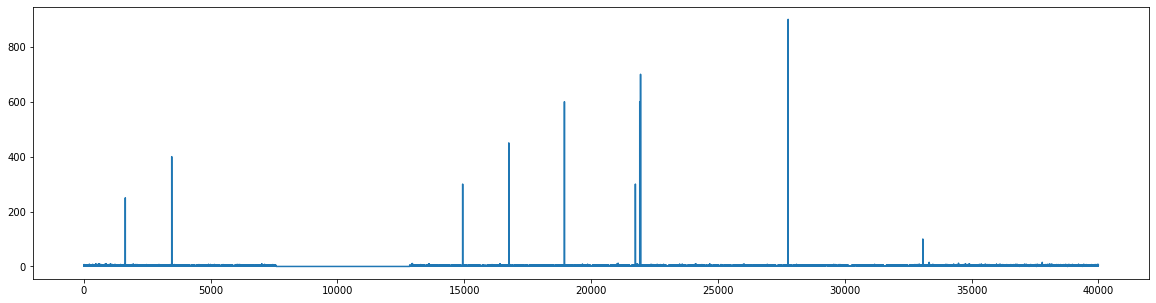

In [82]:
# Plot of 'occupants_count'
plt.figure(figsize = (20, 5))
plt.plot(dataset_occupants_count['occupants_count'])
plt.show()

In [83]:
# Occupants_count feature has unrealistic values so can be dropped

In [84]:
# Details of 'house_area' column
dataset.house_area.describe()

count     40000.000000
mean        552.804750
std        4596.921905
min           0.000000
25%         200.000000
50%         400.000000
75%         600.000000
max      700000.000000
Name: house_area, dtype: float64

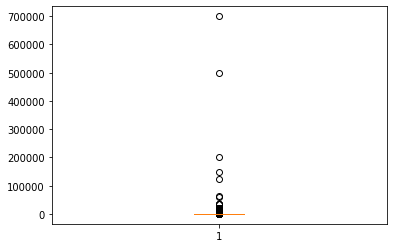

In [85]:
# Let's find out outliers
plt.figure()
plt.boxplot(dataset.house_area)
plt.show()

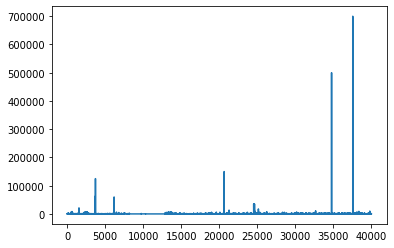

In [86]:
# Plot of 'house_area' column
plt.figure()
plt.plot(dataset.house_area)
plt.show()

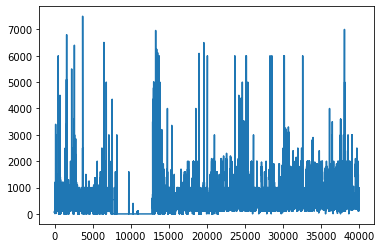

In [87]:
# Let's remove outlier
plt.figure()
plt.plot(dataset.house_area[dataset['house_area']< 8000])
plt.show()

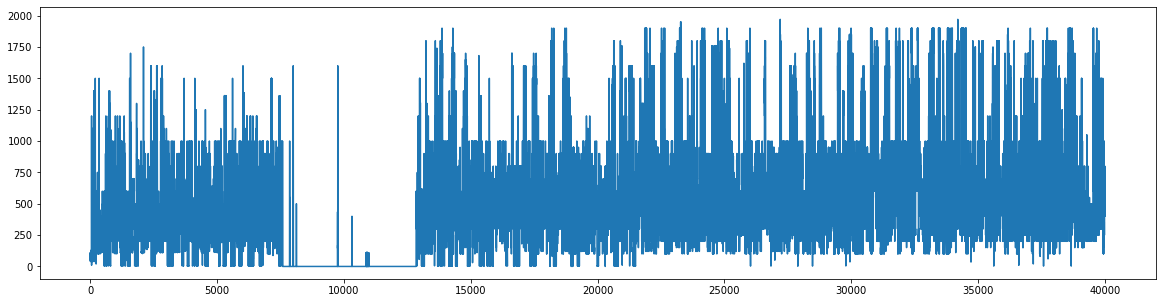

In [88]:
plt.figure(figsize=(20, 5))
plt.plot(dataset.house_area[dataset['house_area']< 2000])
plt.show()

In [89]:
# After removing outliers let's find out average house area
dataset_house_area_avg = dataset.house_area[dataset['house_area']<2000].mean()
dataset_house_area_avg

457.73037100949097

In [90]:
# Replace outliers with average value of house area
def house_area_avg(x):
    if x > 1000:
        x = 458
    return x
dataset['house_area'] = dataset.house_area.apply(lambda x : house_area_avg(x))

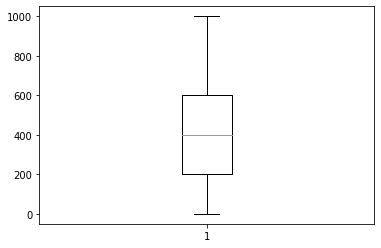

In [91]:
# Plot of house area to find out outlier
plt.figure()
plt.boxplot(dataset.house_area)
plt.show()

In [92]:
# Different values present in feature: sanitary_availability
dataset.sanitary_availability.unique()

array([ 1., nan,  0., -1.])

In [93]:
# count of different unique value
dataset.groupby('sanitary_availability').sanitary_availability.count()

sanitary_availability
-1.0        1
 0.0    12478
 1.0    27313
Name: sanitary_availability, dtype: int64

In [94]:
# Missing values in sanitary_availability
dataset.sanitary_availability.isnull().sum()

208

In [95]:
# replacing unrealistic value
for i in range (0, 40000):
    if dataset.sanitary_availability[i]== -1.0:
        dataset.sanitary_availability[i] = 1.0

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [96]:
dataset.sanitary_availability.unique()

array([ 1., nan,  0.])

In [97]:
# replacing null value with highest variable
dataset['sanitary_availability'] = dataset['sanitary_availability'].fillna(1.0)

In [98]:
# Count of each unique value in sanitary_availability
avg_loan_amount_by_sanitary_availability = dataset.groupby('sanitary_availability').loan_amount.mean().round()
dataset[['sanitary_availability','loan_amount']].groupby('sanitary_availability', as_index = False).loan_amount.mean().round()

,sanitary_availability,loan_amount
0,0.0,7573.0
1,1.0,8793.0


C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


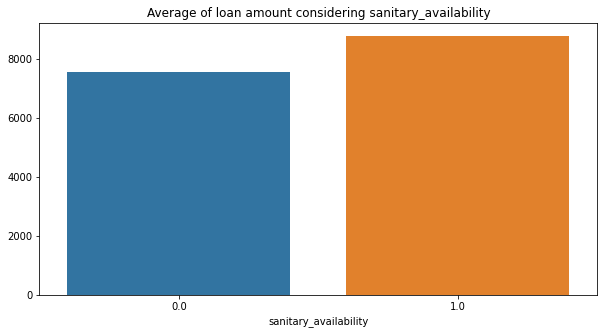

In [99]:
# plot of Average of loan amount considering sanitary_availability
plt.figure(figsize = (10, 5))
plt.title('Average of loan amount considering sanitary_availability')
sns.barplot(avg_loan_amount_by_sanitary_availability.index, avg_loan_amount_by_sanitary_availability.values)
plt.show()

In [100]:
# Different values present in feature: water_availabity
dataset.water_availabity.unique()

array([ 0.5,  nan,  1. ,  0. , -1. ])

In [101]:
# Count each entries
dataset.groupby('water_availabity').water_availabity.count()

water_availabity
-1.0        1
 0.0      182
 0.5    16782
 1.0    17782
Name: water_availabity, dtype: int64

In [102]:
# null values in water availabity
dataset.water_availabity.isnull().sum()

5253

In [103]:
for i in range (0, 40000):
    if dataset.water_availabity[i]== -1.0:
        dataset.water_availabity[i] = 1.0

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
dataset.water_availabity.unique()

array([0.5, nan, 1. , 0. ])

In [105]:
avg_loan_amount_by_water_availabity = dataset.groupby('water_availabity').loan_amount.mean().round()
dataset[['water_availabity', 'loan_amount']].groupby('water_availabity', as_index = False).loan_amount.mean().round()

,water_availabity,loan_amount
0,0.0,9148.0
1,0.0,7648.0
2,1.0,10039.0


C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


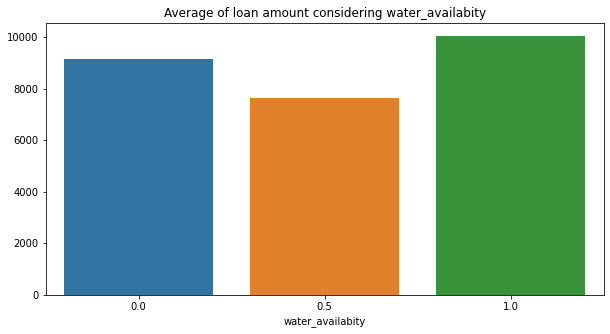

In [106]:
plt.figure(figsize = (10, 5))
plt.title('Average of loan amount considering water_availabity')
sns.barplot(avg_loan_amount_by_water_availabity.index, avg_loan_amount_by_water_availabity.values)
plt.show()

In [107]:
# fill null value
dataset['water_availabity'] = dataset['water_availabity'].fillna(method = 'ffill')

In [108]:
# Number of missing values in each features
dataset.isnull().sum()

Id                              0
city                         1864
age                             0
sex                             0
social_class                 5255
primary_business                0
secondary_business           5241
annual_income                   0
monthly_expenses                0
old_dependents                  0
young_dependents                0
home_ownership                  0
type_of_house                   0
occupants_count                 0
house_area                      0
sanitary_availability           0
water_availabity                0
loan_purpose                   26
loan_tenure                     0
loan_installments               0
loan_amount                     0
age_cat                         0
primary_business_cat            0
secondary_business_YES_NO       0
annual_income_cat               0
monthly_expenses_cat            0
dtype: int64

In [109]:
# Entries in Loan tenure
dataset.loan_tenure.unique()

array([12, 24, 84,  6,  3, 18, 14, 15, 72, 60, 48], dtype=int64)

In [110]:
# Average loan amount for each loan tenure
loan_tenure_loan_amount  = dataset.groupby('loan_tenure').loan_amount.mean().round()
dataset[['loan_tenure', 'loan_amount']].groupby('loan_tenure', as_index = False).loan_amount.mean().round()

,loan_tenure,loan_amount
0,3,500000.0
1,6,8369.0
2,12,8256.0
3,14,13350.0
4,15,13585.0
5,18,191683.0
6,24,21939.0
7,48,76500.0
8,60,50000.0
9,72,50000.0


C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


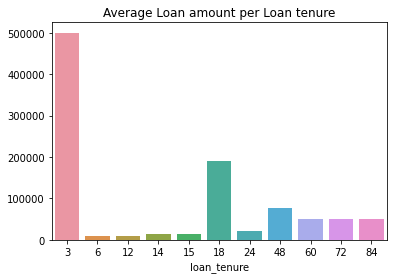

In [111]:
# Plot of Average loan against various loan tenure
plt.figure()
sns.barplot(loan_tenure_loan_amount.index, loan_tenure_loan_amount.values)
plt.title('Average Loan amount per Loan tenure')
plt.show()

In [112]:
# Loan Installments entries
dataset.loan_installments.unique()

array([12, 50, 24,  6, 74, 51, 53, 52, 55,  4,  8, 84,  2,  1,  0, 18, 58,
       15, 72, 60, 48], dtype=int64)

In [113]:
# Average Loan amount for each Loan Installments
loan_installments_loan_amount  = dataset.groupby('loan_installments').loan_amount.mean().round()
dataset[['loan_installments', 'loan_amount']].groupby('loan_installments', as_index = False).loan_amount.mean().round()

,loan_installments,loan_amount
0,0,40000.0
1,1,500000.0
2,2,6809.0
3,4,109733.0
4,6,9032.0
5,8,84833.0
6,12,8045.0
7,15,13585.0
8,18,191683.0
9,24,18061.0


C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


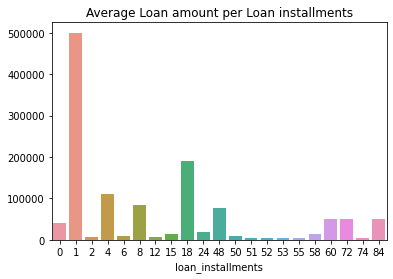

In [114]:
# Plot for Average loan amount vs each loan tenure
plt.figure()
sns.barplot(loan_installments_loan_amount.index, loan_installments_loan_amount.values)
plt.title('Average Loan amount per Loan installments')
plt.show()

In [115]:
# Preapare for Correlation
dataset_correlation = dataset.drop(['Id', 'city', 'age','social_class', 'primary_business','secondary_business',\
                                   'occupants_count', 'home_ownership','loan_purpose'], axis = 1 )
dataset_correlation.head()

,sex,annual_income,monthly_expenses,old_dependents,young_dependents,type_of_house,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount,age_cat,primary_business_cat,secondary_business_YES_NO,annual_income_cat,monthly_expenses_cat
0,F,36000.0,5000.0,0,2,R,70.0,1.0,0.5,12,12,5000.0,20s,business,YES,low,low
1,F,94000.0,3600.0,1,1,T1,80.0,1.0,0.5,12,50,7500.0,20s,business,NO,low,low
2,M,48000.0,4000.0,0,2,T1,50.0,1.0,0.5,12,12,5000.0,20s,business,YES,low,low
3,F,7000.0,5000.0,0,2,T1,50.0,1.0,0.5,12,50,7500.0,20s,business,NO,low,low
4,F,36000.0,3500.0,0,0,T1,112.0,1.0,0.5,12,12,5000.0,20s,shop,YES,low,low


In [116]:
dataset_correlation.isnull().sum()

sex                          0
annual_income                0
monthly_expenses             0
old_dependents               0
young_dependents             0
type_of_house                0
house_area                   0
sanitary_availability        0
water_availabity             0
loan_tenure                  0
loan_installments            0
loan_amount                  0
age_cat                      0
primary_business_cat         0
secondary_business_YES_NO    0
annual_income_cat            0
monthly_expenses_cat         0
dtype: int64

In [117]:
# Find out the datatypes
dataset_correlation.dtypes

sex                            object
annual_income                 float64
monthly_expenses              float64
old_dependents                  int64
young_dependents                int64
type_of_house                  object
house_area                    float64
sanitary_availability         float64
water_availabity              float64
loan_tenure                     int64
loan_installments               int64
loan_amount                   float64
age_cat                        object
primary_business_cat           object
secondary_business_YES_NO      object
annual_income_cat            category
monthly_expenses_cat         category
dtype: object

In [118]:
# Convert datatype to 'object' type
dataset_correlation.old_dependents = dataset_correlation.old_dependents.astype('object')
dataset_correlation.young_dependents = dataset_correlation.young_dependents.astype('object')
dataset_correlation.sanitary_availability = dataset_correlation.sanitary_availability.astype('object')
dataset_correlation.water_availabity = dataset_correlation.water_availabity.astype('object')

In [119]:
dataset_correlation.dtypes

sex                            object
annual_income                 float64
monthly_expenses              float64
old_dependents                 object
young_dependents               object
type_of_house                  object
house_area                    float64
sanitary_availability          object
water_availabity               object
loan_tenure                     int64
loan_installments               int64
loan_amount                   float64
age_cat                        object
primary_business_cat           object
secondary_business_YES_NO      object
annual_income_cat            category
monthly_expenses_cat         category
dtype: object

In [120]:
# Create dummy variables and drop first to avoid dummy variable trap
# Before we create dummies all the varaibles meant for dummies must be an object or category data type.
dataset_prep = pd.get_dummies(dataset_correlation, drop_first = True)

In [121]:
dataset_prep.head()

,annual_income,monthly_expenses,house_area,loan_tenure,loan_installments,loan_amount,sex_M,sex_TG,old_dependents_1,old_dependents_2,...,primary_business_cat_cultivation,primary_business_cat_job,primary_business_cat_rearing,primary_business_cat_shop,secondary_business_YES_NO_YES,annual_income_cat_medium,annual_income_cat_high,annual_income_cat_extremely high,monthly_expenses_cat_medium,monthly_expenses_cat_high
0,36000.0,5000.0,70.0,12,12,5000.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,94000.0,3600.0,80.0,12,50,7500.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,48000.0,4000.0,50.0,12,12,5000.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7000.0,5000.0,50.0,12,50,7500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,36000.0,3500.0,112.0,12,12,5000.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [122]:
# Find the correlation among Features
correlation = dataset_prep.corr()
correlation

,annual_income,monthly_expenses,house_area,loan_tenure,loan_installments,loan_amount,sex_M,sex_TG,old_dependents_1,old_dependents_2,...,primary_business_cat_cultivation,primary_business_cat_job,primary_business_cat_rearing,primary_business_cat_shop,secondary_business_YES_NO_YES,annual_income_cat_medium,annual_income_cat_high,annual_income_cat_extremely high,monthly_expenses_cat_medium,monthly_expenses_cat_high
annual_income,1.000000,0.117319,0.268788,-0.027618,-0.119936,0.085632,0.075923,0.004532,0.059477,0.020062,...,0.003681,0.035047,0.073473,0.002419,-0.323112,0.192482,0.226239,0.261396,0.049029,0.006120
monthly_expenses,0.117319,1.000000,-0.054366,-0.013443,0.115549,0.020096,-0.010730,0.000625,-0.006747,0.004521,...,-0.028024,0.023022,0.038200,-0.016312,0.062156,0.006408,0.001358,0.001907,0.816667,0.346504
house_area,0.268788,-0.054366,1.000000,-0.010888,-0.160135,0.060480,0.155467,0.006165,0.065664,0.020434,...,-0.018085,-0.010760,0.015185,0.019772,-0.349521,0.013446,0.008664,0.001128,-0.044869,0.006734
loan_tenure,-0.027618,-0.013443,-0.010888,1.000000,0.067601,0.082230,0.085287,-0.000312,-0.027884,0.006542,...,-0.146401,-0.004379,0.019366,-0.003288,0.049117,0.007424,0.012463,-0.000167,0.002078,0.017625
loan_installments,-0.119936,0.115549,-0.160135,0.067601,1.000000,0.015981,-0.065942,-0.000264,-0.031170,-0.013053,...,-0.123670,-0.103969,-0.075847,-0.027601,-0.095936,-0.007640,-0.004029,-0.004138,0.084327,0.003602
loan_amount,0.085632,0.020096,0.060480,0.082230,0.015981,1.000000,0.010864,0.000572,0.003318,0.008309,...,-0.012585,-0.001238,-0.012407,-0.015912,-0.076249,0.017775,0.003134,0.001086,-0.010508,0.015393
sex_M,0.075923,-0.010730,0.155467,0.085287,-0.065942,0.010864,1.000000,-0.003321,0.095952,0.052335,...,0.081399,-0.030139,-0.071722,0.079619,-0.010905,0.003937,-0.002174,-0.001775,-0.001929,0.005570
sex_TG,0.004532,0.000625,0.006165,-0.000312,-0.000264,0.000572,-0.003321,1.000000,-0.002650,-0.000741,...,-0.003719,-0.002458,0.004932,0.001596,-0.004923,-0.000187,-0.000115,-0.000094,-0.000822,-0.000162
old_dependents_1,0.059477,-0.006747,0.065664,-0.027884,-0.031170,0.003318,0.095952,-0.002650,1.000000,-0.011215,...,0.053798,0.003254,-0.026179,0.022301,-0.049529,0.006347,-0.001735,-0.001416,-0.006164,0.008147
old_dependents_2,0.020062,0.004521,0.020434,0.006542,-0.013053,0.008309,0.052335,-0.000741,-0.011215,1.000000,...,0.010046,0.004559,-0.001232,-0.001775,-0.007209,-0.000792,-0.000485,-0.000396,0.003752,-0.000686


In [123]:
# It looks like 'sex_TG', 'old_dependents_3' and 'young_dependents_7', 'age_cat_50s' and 'age_cat_60s' have comparatively less corelationship with 'loan_amount'

In [125]:
# Create X, Y
X = dataset_prep.drop(['loan_amount'], axis = 1)
Y = dataset_prep[['loan_amount']]

In [126]:
from sklearn.preprocessing import StandardScaler
scaler_ = StandardScaler()

X_scaler = scaler_.fit_transform(X)

In [127]:
# Let's find out the importance of features using REgularisation technique
from sklearn.linear_model import Lasso
lasso = Lasso (alpha = 0.1)
lasso.fit(X_scaler, Y)

Lasso(alpha=0.1)

In [128]:
lasso_coef = lasso.coef_
df_lasso_coef = pd.DataFrame()
df_lasso_coef['Features'] = X.columns
df_lasso_coef['Coefficient'] = lasso_coef
df_lasso_coef1 = df_lasso_coef.sort_values(by = 'Coefficient')
df_lasso_coef1

,Features,Coefficient
36,monthly_expenses_cat_medium,-1149.378456
32,secondary_business_YES_NO_YES,-875.201779
20,water_availabity_0.5,-866.098326
17,type_of_house_T1,-360.967637
11,young_dependents_2,-323.953582
12,young_dependents_3,-303.627235
10,young_dependents_1,-277.516006
37,monthly_expenses_cat_high,-256.532069
21,water_availabity_1.0,-219.857291
13,young_dependents_4,-219.213545


In [129]:
# data of 'df_lasso_coef1' table shows Sex_TG, old_dependents_3, 'young_dependents_7' 
# features have least relationship with target data 

In [130]:
# Let's drop features: 'sex_TG', 'old_dependents_3',  'young_dependents_7'
# as they have least relationship with target feature 
X1 = X.drop(['sex_TG', 'old_dependents_3',  'young_dependents_7' ], axis = 1)

In [131]:
# Create training set at 80% of dataset
train_size = int(0.8* len(dataset_prep))
print (train_size)

32000


In [132]:
# Split the data
X_train = X1.iloc[0:train_size, :]
X_test = X1.iloc[train_size: , : ]
Y_train = Y.iloc[0:train_size, :]
Y_test = Y.iloc[train_size: , :]

In [133]:
# Let's normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train['monthly_expenses'] = scaler.fit_transform(X_train[['monthly_expenses']])
X_train['annual_income'] = scaler.fit_transform(X_train[['annual_income']])
X_train['loan_tenure'] = scaler.fit_transform(X_train[['loan_tenure']])
X_train['loan_installments'] = scaler.fit_transform(X_train[['loan_installments']])
X_train['house_area'] = scaler.fit_transform(X_train[['house_area']])

X_test['monthly_expenses'] = scaler.transform(X_test[['monthly_expenses']])
X_test['annual_income'] = scaler.transform(X_test[['annual_income']])
X_test['loan_tenure'] = scaler.transform(X_test[['loan_tenure']])
X_test['loan_installments'] = scaler.transform(X_test[['loan_installments']])
X_test['house_area'] = scaler.transform(X_test[['house_area']])

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [134]:
# train the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [135]:
# Find the prediction for X_test
Y_predict = lr.predict(X_test)
Y_predict

array([[121522.18254297],
       [123304.02241076],
       [122228.84764074],
       ...,
       [124375.76334732],
       [123810.50528528],
       [182519.36150423]])

In [136]:
# R-squared value:
lr_score_train = lr.score(X_train, Y_train)
lr_score_test = lr.score(X_test, Y_test)
print (lr_score_train, lr_score_test)

0.0410614497067876 -41.3986730490754


In [137]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
import math
rms_error = math.sqrt(mean_squared_error(Y_test, Y_predict))
rms_error

157621.18666745702

In [138]:
test_df = pd.DataFrame(Y_test.values)
predict_df = pd.DataFrame(Y_predict)
df = pd.concat([test_df, predict_df ], axis = 1)
df.columns = ['Actual', 'Predicted']
df

,Actual,Predicted
0,10000.0,121522.182543
1,10000.0,123304.022411
2,10000.0,122228.847641
3,10000.0,121752.079018
4,10000.0,122982.892788
...,...,...
7995,8000.0,196486.367646
7996,8000.0,124889.495348
7997,8000.0,124375.763347
7998,8000.0,123810.505285


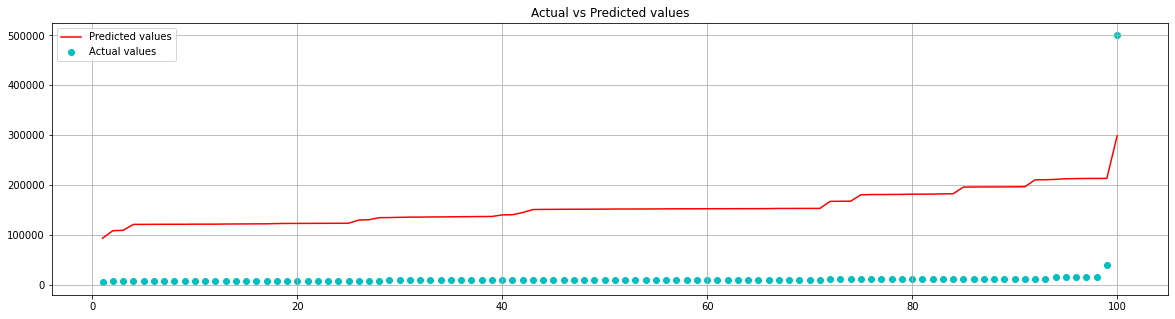

In [139]:
plt.figure(figsize = (20,5))
plt.title('Actual vs Predicted values')
plt.scatter(range(1, 101), df['Actual'][0:100].sort_values(), label = 'Actual values', color = 'c')
plt.plot(range(1, 101), df['Predicted'][0:100].sort_values(), label = 'Predicted values', color = 'r')
plt.legend()
plt.grid()
plt.show()

In [140]:
# Create the model using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state = 1234)
dtc.fit (X_train, Y_train)

DecisionTreeRegressor(random_state=1234)

In [141]:
dtc_predict = dtc.predict(X_test)
print (Y_predict)

[[121522.18254297]
 [123304.02241076]
 [122228.84764074]
 ...
 [124375.76334732]
 [123810.50528528]
 [182519.36150423]]


In [142]:
from sklearn.metrics import mean_squared_error
import math
rms_error = math.sqrt(mean_squared_error(Y_test, dtc_predict))
rms_error
#X_train.reshape((32000,))

24297.009526780133

In [143]:
#Apply HyperParameter Tuning with RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV
param_grid = {'bootstrap': [True],'n_estimators': [10, 15, 20, 25], 'min_samples_split': [8,10,12], 'min_samples_leaf': [1, 2, 3, 4,5] }
rf_grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 10,return_train_score = True)
rf_grid_fit = rf_grid.fit(X_train, Y_train)

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\sklearn\mod

In [144]:
best_params = rf_grid_fit.best_params_
best_params

{'bootstrap': True,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 20}

In [145]:
from sklearn.ensemble import RandomForestRegressor
rfr1 = RandomForestRegressor(bootstrap = True, min_samples_leaf = 5, min_samples_split = 8, n_estimators = 15)
rfr1.fit(X_train, Y_train)

C:\Users\Ela Shresth\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(min_samples_leaf=5, min_samples_split=8, n_estimators=15)

In [146]:
rfr1_predict = rfr1.predict(X_test)

In [147]:
from sklearn.metrics import mean_squared_error
import math
rms_error_rfr1 = math.sqrt(mean_squared_error(Y_test, rfr1_predict))
rms_error_rfr1

76047.47924221089